<a href="https://colab.research.google.com/github/Tanvir284/Pneumonia-Classification-with-YOLOv8/blob/main/Pneumonia_Classification_with_YOLOv8.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
# IMPORTANT: SOME KAGGLE DATA SOURCES ARE PRIVATE
# RUN THIS CELL IN ORDER TO IMPORT YOUR KAGGLE DATA SOURCES.
import kagglehub
kagglehub.login()


In [ ]:
# IMPORTANT: RUN THIS CELL IN ORDER TO IMPORT YOUR KAGGLE DATA SOURCES,
# THEN FEEL FREE TO DELETE THIS CELL.
# NOTE: THIS NOTEBOOK ENVIRONMENT DIFFERS FROM KAGGLE'S PYTHON
# ENVIRONMENT SO THERE MAY BE MISSING LIBRARIES USED BY YOUR
# NOTEBOOK.

mdtanvirruhit_pneumonia_dataset_self_path = kagglehub.dataset_download('mdtanvirruhit/pneumonia-dataset-self')

print('Data source import complete.')


# Step 1: Import all the necessary Libraries

In [ ]:
!pip install ultralytics --quiet

import os
import glob
from ultralytics import YOLO
import shutil



[notice] A new release of pip is available: 25.0.1 -> 25.3
[notice] To update, run: pip install --upgrade pip
Creating new Ultralytics Settings v0.0.6 file ✅ 
View Ultralytics Settings with 'yolo settings' or at '/root/.config/Ultralytics/settings.json'
Update Settings with 'yolo settings key=value', i.e. 'yolo settings runs_dir=path/to/dir'. For help see https://docs.ultralytics.com/quickstart/#ultralytics-settings.


# Step 2: Locate dataset automatically

In [ ]:

base_path = "/kaggle/input/pneumonia-dataset-self"

# check if dataset has subfolder inside
items = os.listdir(base_path)
if len(items) == 1 and os.path.isdir(os.path.join(base_path, items[0])):
    dataset_path = os.path.join(base_path, items[0])
else:
    dataset_path = base_path

print("✅ Dataset path set to:", dataset_path)
print("📂 Available folders:", os.listdir(dataset_path))





✅ Dataset path set to: /kaggle/input/pneumonia-dataset-self/Dataset-main
📂 Available folders: ['Normal', 'valid', 'Not normal']


# Step 3: Prepare YOLO format dataset

In [ ]:
# YOLO needs images + labels. For classification, only folders are needed.
# Expected structure:
# datasets/pneumonia/train/
# ├── Normal
# ├── Not_Normal
# ├── Valid

dataset_yolo = "/kaggle/working/pneumonia_yolo"
if os.path.exists(dataset_yolo):
    shutil.rmtree(dataset_yolo)

# Copy dataset to working dir (YOLO will modify)
shutil.copytree(dataset_path, dataset_yolo)

print("✅ Dataset copied to working dir:", dataset_yolo)
print("📂 Structure:", os.listdir(dataset_yolo))


✅ Dataset copied to working dir: /kaggle/working/pneumonia_yolo
📂 Structure: ['valid', 'Normal', 'Not normal']


# Step 4: Train YOLOv8 Classification model

In [ ]:

model = YOLO("yolov8n-cls.pt")  # nano version for speed; can use yolov8s-cls.pt for better accuracy

results = model.train(
    data=dataset_yolo,
    epochs=15,          # increase if GPU available
    imgsz=224,
    batch=16,
    project="/kaggle/working/pneumonia_yolo_results",
    name="cls_model"
)


Ultralytics 8.3.226 🚀 Python-3.12.12 torch-2.8.0+cpu CPU (AMD EPYC 7B13)
engine/trainer: agnostic_nms=False, amp=True, augment=False, auto_augment=randaugment, batch=16, bgr=0.0, box=7.5, cache=False, cfg=None, classes=None, close_mosaic=10, cls=0.5, compile=False, conf=None, copy_paste=0.0, copy_paste_mode=flip, cos_lr=False, cutmix=0.0, data=/kaggle/working/pneumonia_yolo, degrees=0.0, deterministic=True, device=cpu, dfl=1.5, dnn=False, dropout=0.0, dynamic=False, embed=None, epochs=15, erasing=0.4, exist_ok=False, fliplr=0.5, flipud=0.0, format=torchscript, fraction=1.0, freeze=None, half=False, hsv_h=0.015, hsv_s=0.7, hsv_v=0.4, imgsz=224, int8=False, iou=0.7, keras=False, kobj=1.0, line_width=None, lr0=0.01, lrf=0.01, mask_ratio=4, max_det=300, mixup=0.0, mode=train, model=yolov8n-cls.pt, momentum=0.937, mosaic=1.0, multi_scale=False, name=cls_model, nbs=64, nms=False, opset=None, optimize=False, optimizer=auto, overlap_mask=True, patience=100, perspective=0.0, plots=True, pose=12

# Step 5: Evaluate model

In [ ]:

metrics = model.val()
print("📊 Validation Metrics:", metrics)


Ultralytics 8.3.226 🚀 Python-3.12.12 torch-2.8.0+cpu CPU (AMD EPYC 7B13)
YOLOv8n-cls summary (fused): 30 layers, 1,438,723 parameters, 0 gradients, 3.3 GFLOPs
WARNING ⚠️ Dataset 'split=train' not found at /kaggle/working/pneumonia_yolo/train
Found 137 images in subdirectories. Attempting to split...
Splitting /kaggle/working/pneumonia_yolo (3 classes, 216 images) into 80% train, 20% val...
Split complete in /kaggle/working/pneumonia_yolo_split ✅
train: /kaggle/working/pneumonia_yolo_split/train... found 215 images in 3 classes ✅ 
val: /kaggle/working/pneumonia_yolo_split/val... found 106 images in 3 classes ✅ 
test: None...
val: Fast image access ✅ (ping: 0.0±0.0 ms, read: 5344.6±1114.6 MB/s, size: 367.0 KB)
val: Scanning /kaggle/working/pneumonia_yolo_split/val... 106 images, 0 corrupt: 100% ━━━━━━━━━━━━ 106/106 3.6Kit/s 0.0s
val: New cache created: /kaggle/working/pneumonia_yolo_split/val.cache
               classes   top1_acc   top5_acc: 100% ━━━━━━━━━━━━ 7/7 2.6it/s 2.7s0.4s
     

# Step 5.1: Display Confusion Matrix

🎨 Displaying confusion matrix from: /kaggle/working/runs/classify/val/confusion_matrix.png


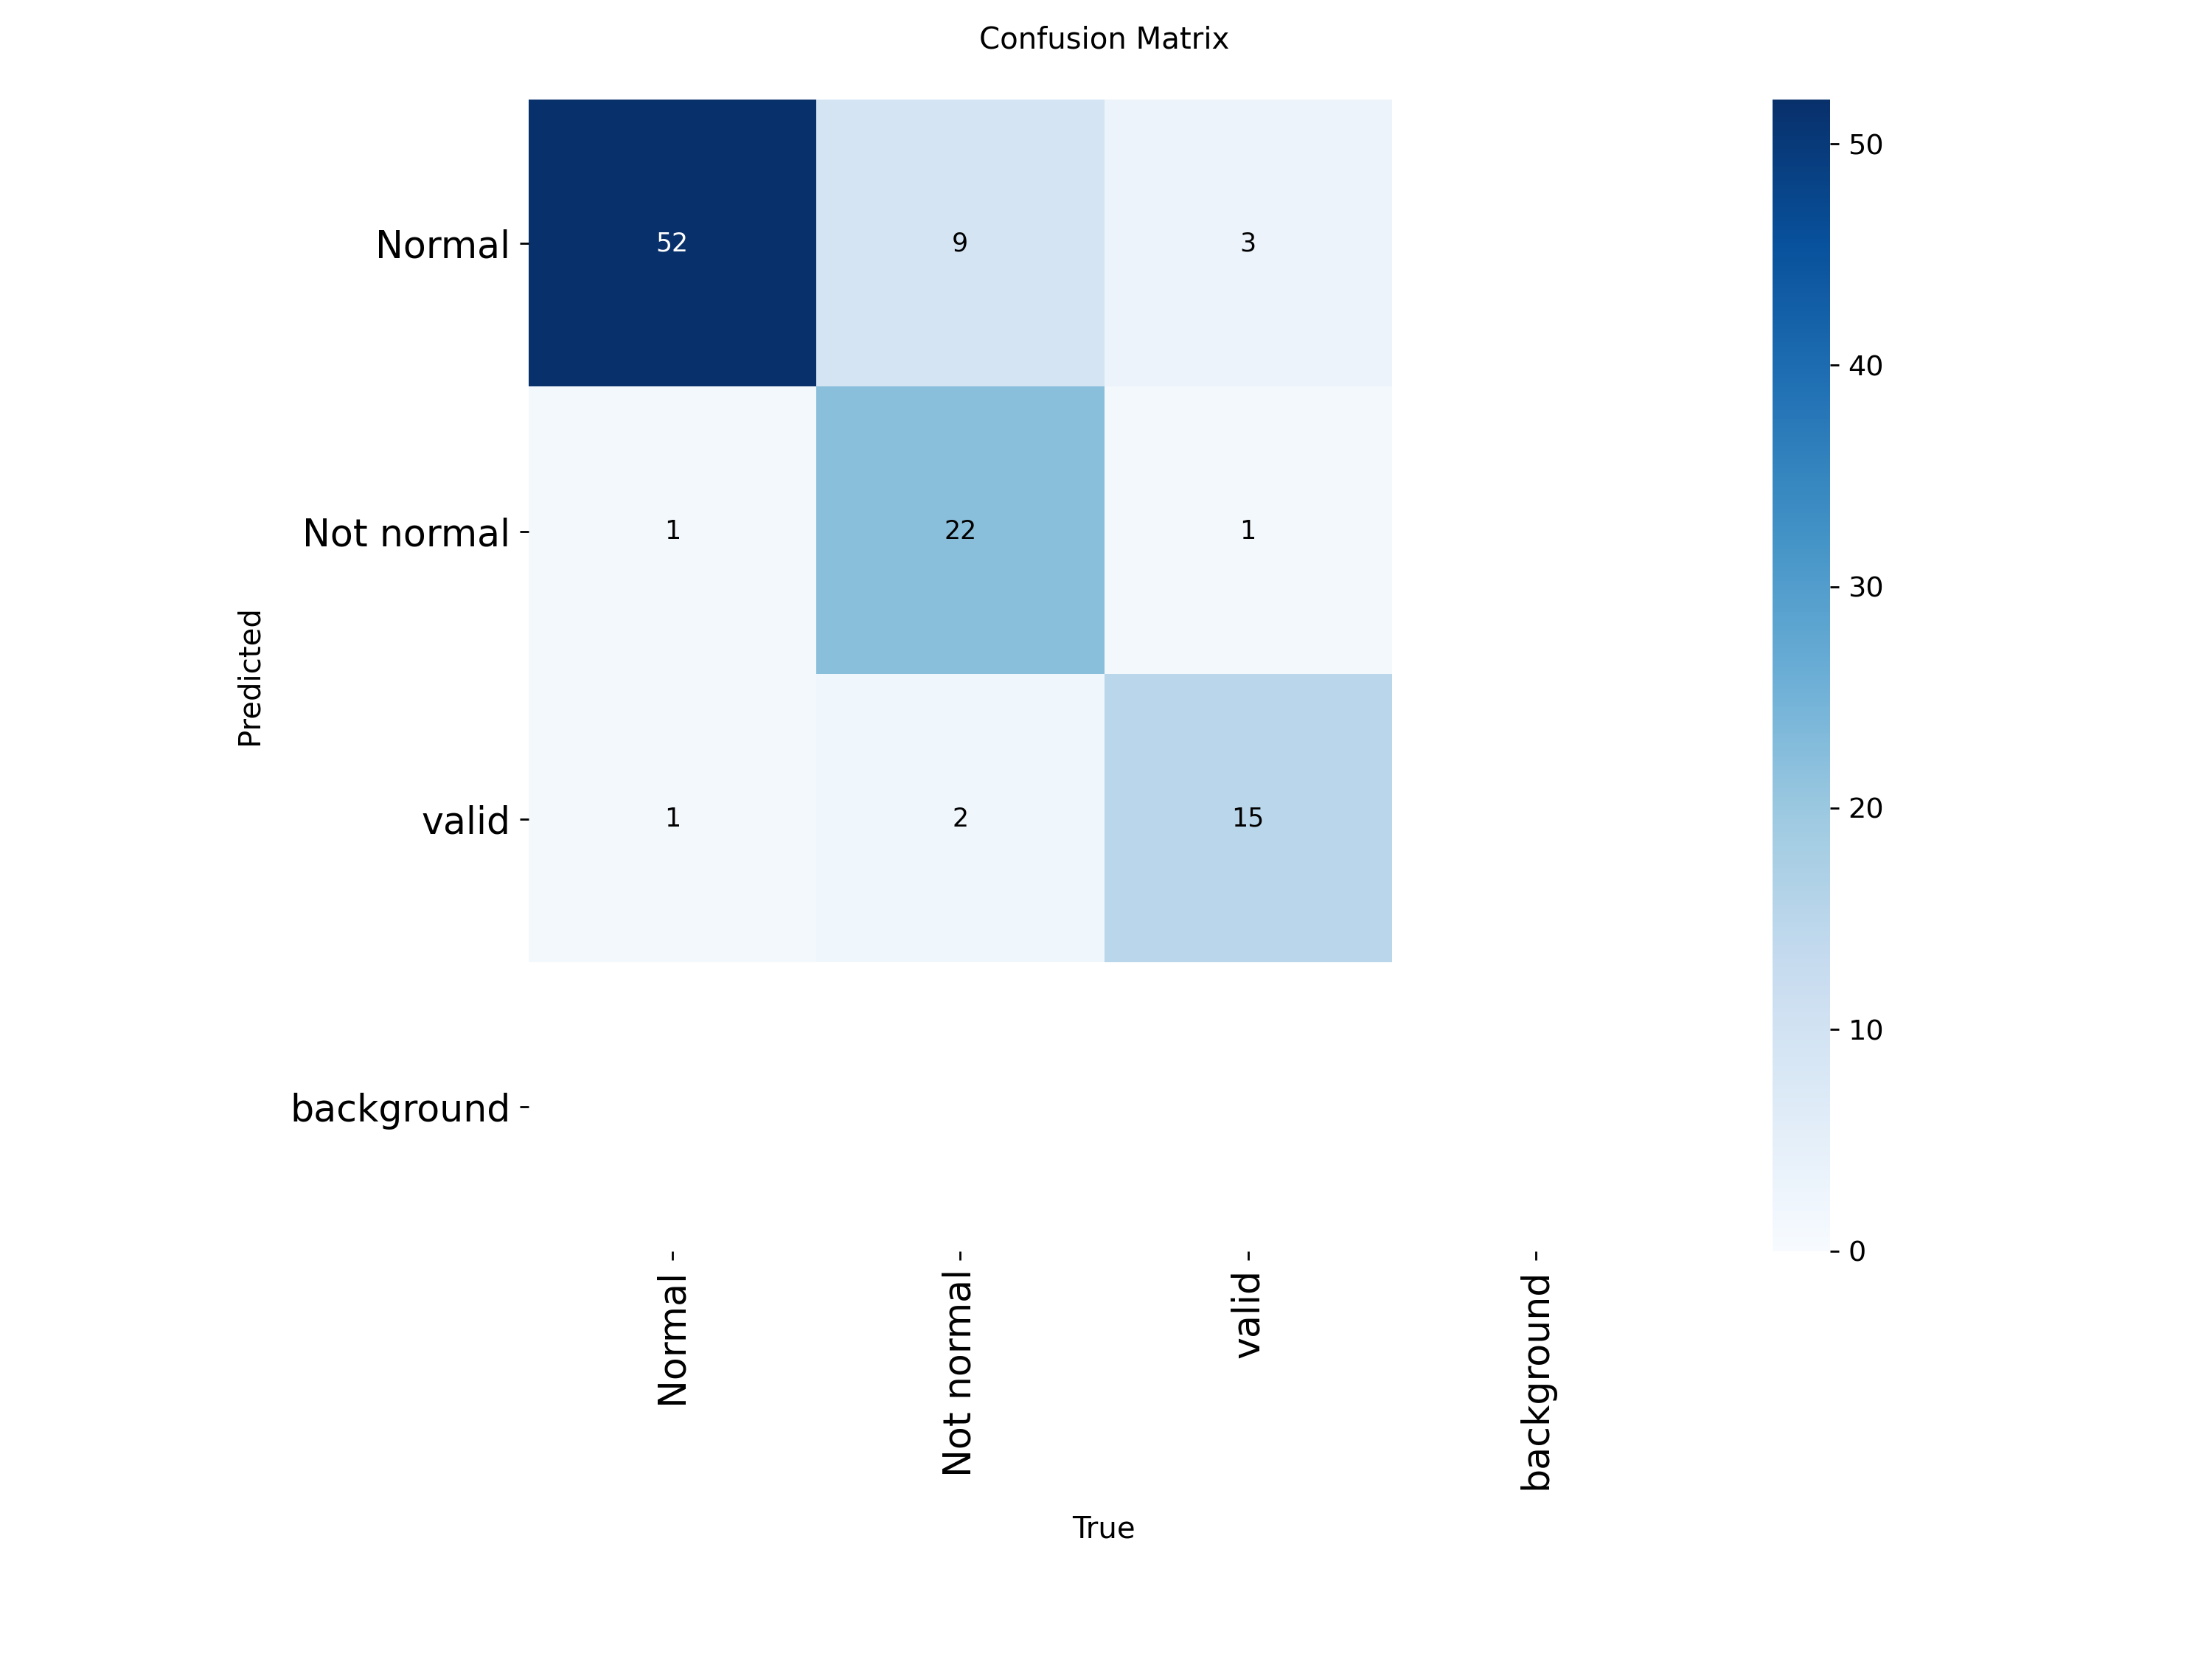

In [ ]:

# The `model.val()` call automatically generates and saves a confusion matrix plot.
# We can find it in the results directory and display it directly.

import os
from IPython.display import Image, display

# The path to the directory where results are saved is in the metrics object
results_dir = metrics.save_dir
confusion_matrix_path = os.path.join(results_dir, "confusion_matrix.png")

print(f"🎨 Displaying confusion matrix from: {confusion_matrix_path}")

# Check if the file exists and then display it
if os.path.exists(confusion_matrix_path):
    display(Image(filename=confusion_matrix_path))
else:
    print("⚠️ Confusion matrix image not found automatically.")
    print("Attempting to plot manually. Note: Class labels may not be displayed.")
    # Fallback to plotting without names if the file isn't found
    metrics.confusion_matrix.plot()
    plt.show()


# Step 6: Run prediction on sample images

In [ ]:

import glob
import os

# The trainer object stores all arguments used for the training run.
# We can get the original data path from 'model.trainer.args.data'.
data_dir = model.trainer.args.data

# From the training output, we know YOLOv8 creates a new directory for the
# split dataset by appending '_split' to the original data directory name.
# We can reliably construct the path to the 'val' folder from this.
val_dir = os.path.join(f"{data_dir}_split", "val")

print(f"✅ Constructed validation directory path: {val_dir}\n")

# Find all .jpeg and .jpg image files in the class subdirectories
val_images = glob.glob(os.path.join(val_dir, "*", "*.jpeg")) + glob.glob(os.path.join(val_dir, "*", "*.jpg"))

# Select up to 5 images to run predictions on
sample_images = val_images[:5]

print(f"🔮 Running predictions on {len(sample_images)} sample images...")

if not sample_images:
    print("\n⚠️ Could not find any sample images. Let's debug the directory.")
    # List the contents of the expected directory to see what's inside
    try:
        print(f"Contents of '{val_dir}': {os.listdir(val_dir)}")
        # Check subdirectories too
        for class_folder in os.listdir(val_dir):
            class_path = os.path.join(val_dir, class_folder)
            if os.path.isdir(class_path):
                 print(f"  - Contents of '{class_path}': {os.listdir(class_path)[:5]}")
    except FileNotFoundError:
        print(f"  - The directory '{val_dir}' was not found.")
else:
    for img_path in sample_images:
        # Perform prediction
        preds = model(img_path)

        # Get the top prediction's class index and confidence
        top1_index = preds[0].probs.top1
        top1_confidence = preds[0].probs.top1conf

        # Get the class name using the index
        predicted_class_name = model.names[top1_index]

        print(f"  - Image: {os.path.basename(img_path)}")
        print(f"    Prediction: '{predicted_class_name}', Confidence: {top1_confidence:.2f}\n")

✅ Constructed validation directory path: /kaggle/working/pneumonia_yolo_split/val

🔮 Running predictions on 5 sample images...

image 1/1 /kaggle/working/pneumonia_yolo_split/val/Normal/WhatsApp Image 2025-07-21 at 7.15.57 PM (1).jpeg: 224x224 Normal 0.93, Not normal 0.06, valid 0.00, 10.2ms
Speed: 6.2ms preprocess, 10.2ms inference, 0.0ms postprocess per image at shape (1, 3, 224, 224)
  - Image: WhatsApp Image 2025-07-21 at 7.15.57 PM (1).jpeg
    Prediction: 'Normal', Confidence: 0.93


image 1/1 /kaggle/working/pneumonia_yolo_split/val/Normal/WhatsApp Image 2025-07-21 at 7.18.51 PM.jpeg: 224x224 Normal 0.95, Not normal 0.05, valid 0.00, 6.7ms
Speed: 6.1ms preprocess, 6.7ms inference, 0.0ms postprocess per image at shape (1, 3, 224, 224)
  - Image: WhatsApp Image 2025-07-21 at 7.18.51 PM.jpeg
    Prediction: 'Normal', Confidence: 0.95


image 1/1 /kaggle/working/pneumonia_yolo_split/val/Normal/WhatsApp Image 2025-07-21 at 7.42.24 PM.jpeg: 224x224 Normal 0.95, Not normal 0.05, valid 

# Step 6.1: Predict a specific "Not normal" image

In [ ]:

import os
import glob
import random

# Define the validation directory path using the same logic as before
val_dir = os.path.join(f"{model.trainer.args.data}_split", "val")

# Construct the path to the specific "Not normal" class folder
# IMPORTANT: The folder name must exactly match your dataset's folder name.
not_normal_dir = os.path.join(val_dir, "Not normal")
print(f"🔍 Searching for 'Not normal' images in: {not_normal_dir}")

# Find all available images in that specific directory
not_normal_images = glob.glob(os.path.join(not_normal_dir, "*.jpeg")) + glob.glob(os.path.join(not_normal_dir, "*.jpg"))

# --- Run Prediction ---
if not_normal_images:
    # Randomly select one image from the list to make it interesting
    image_to_predict = random.choice(not_normal_images)
    print(f"✅ Found {len(not_normal_images)} images. Running prediction on: {os.path.basename(image_to_predict)}\n")

    # Perform the prediction
    preds = model(image_to_predict)

    # Get and display the results
    top1_index = preds[0].probs.top1
    top1_confidence = preds[0].probs.top1conf
    predicted_class_name = model.names[top1_index]

    print("--- 🔬 Prediction Result ---")
    print(f"  Image:      '{os.path.basename(image_to_predict)}'")
    print(f"  Prediction: '{predicted_class_name}'")
    print(f"  Confidence: {top1_confidence:.2f}")
    print("--------------------------")

else:
    print(f"\n⚠️ No images found in the '{not_normal_dir}' directory.")
    print("   Please check that the folder name is correct and contains .jpeg or .jpg files.")

🔍 Searching for 'Not normal' images in: /kaggle/working/pneumonia_yolo_split/val/Not normal
✅ Found 33 images. Running prediction on: WhatsApp Image 2025-07-21 at 7.23.43 PM.jpeg


image 1/1 /kaggle/working/pneumonia_yolo_split/val/Not normal/WhatsApp Image 2025-07-21 at 7.23.43 PM.jpeg: 224x224 Normal 0.56, Not normal 0.43, valid 0.01, 6.7ms
Speed: 5.8ms preprocess, 6.7ms inference, 0.0ms postprocess per image at shape (1, 3, 224, 224)
--- 🔬 Prediction Result ---
  Image:      'WhatsApp Image 2025-07-21 at 7.23.43 PM.jpeg'
  Prediction: 'Normal'
  Confidence: 0.56
--------------------------


# Step 6.2: Batch predict 10 Normal and 10 Not normal images

In [ ]:

import os
import glob
import random

# Define the validation directory path
val_dir = os.path.join(f"{model.trainer.args.data}_split", "val")

# List of classes we want to test
classes_to_predict = ["Normal", "Not normal"]
num_images_per_class = 10

# Loop through each class
for class_name in classes_to_predict:
    print(f"\n===== Predicting {num_images_per_class} '{class_name}' Images =====\n")

    # Construct the full path to the class directory
    class_dir = os.path.join(val_dir, class_name)

    # Find all images for the current class
    all_images = glob.glob(os.path.join(class_dir, "*.jpeg")) + glob.glob(os.path.join(class_dir, "*.jpg"))

    # --- Validate and Select Images ---
    if not all_images:
        print(f"⚠️ No images found for class '{class_name}'. Skipping.")
        continue # Move to the next class

    # Safely select a sample of images, ensuring not to request more than available
    sample_size = min(num_images_per_class, len(all_images))
    images_to_predict = random.sample(all_images, sample_size)

    # --- Run Prediction on Sampled Images ---
    for img_path in images_to_predict:
        # Perform prediction
        preds = model(img_path)

        # Process results
        top1_index = preds[0].probs.top1
        top1_confidence = preds[0].probs.top1conf
        predicted_class_name = model.names[top1_index]

        # Check if the prediction was correct and assign an icon
        is_correct = (predicted_class_name == class_name)
        result_icon = "✅" if is_correct else "❌"

        # Print a formatted result line
        # The formatting helps align the columns for readability
        print(f"{result_icon} Image: {os.path.basename(img_path):<30} | True: {class_name:<12} | Predicted: {predicted_class_name:<12} ({top1_confidence:.2f})")


===== Predicting 10 'Normal' Images =====


image 1/1 /kaggle/working/pneumonia_yolo_split/val/Normal/WhatsApp Image 2025-07-21 at 7.40.27 PM.jpeg: 224x224 Normal 0.98, Not normal 0.02, valid 0.00, 6.7ms
Speed: 5.7ms preprocess, 6.7ms inference, 0.0ms postprocess per image at shape (1, 3, 224, 224)
✅ Image: WhatsApp Image 2025-07-21 at 7.40.27 PM.jpeg | True: Normal       | Predicted: Normal       (0.98)

image 1/1 /kaggle/working/pneumonia_yolo_split/val/Normal/WhatsApp Image 2025-07-21 at 7.19.33 PM (1).jpeg: 224x224 Normal 0.96, Not normal 0.04, valid 0.00, 6.4ms
Speed: 5.7ms preprocess, 6.4ms inference, 0.0ms postprocess per image at shape (1, 3, 224, 224)
✅ Image: WhatsApp Image 2025-07-21 at 7.19.33 PM (1).jpeg | True: Normal       | Predicted: Normal       (0.96)

image 1/1 /kaggle/working/pneumonia_yolo_split/val/Normal/WhatsApp Image 2025-07-30 at 2.35.41 PM.jpeg: 224x224 Normal 1.00, Not normal 0.00, valid 0.00, 7.0ms
Speed: 8.0ms preprocess, 7.0ms inference, 0.0ms postproce

# Step 7: Save best model

In [ ]:

# The path to the best model weights is available in the trained model's trainer attribute
best_model_path = model.trainer.best
print(f"✅ Best model saved at: {best_model_path}")


✅ Best model saved at: /kaggle/working/pneumonia_yolo_results/cls_model/weights/best.pt
